In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190104/datetime_per_area/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']
area_list = [str(i) for i in range(36)]

In [4]:
loc_list = [str(i) for i in [14, 15, 21, 22, 27, 28, 33, 34]]

In [5]:
def show_evaluation(y, y_pred):
    AE = np.sum(np.abs(y-y_pred))
    print('AE', AE)
    MAE = np.mean(np.abs(y-y_pred))
    print('MAE', MAE)
    MAE = np.mean((y-y_pred)**2)
    print('MAE', MAE)
    MCE = np.mean(y != y_pred)
    print('MCE', MCE)
    RMSE = np.sqrt(np.mean((y-y_pred)**2))
    print('RMSE', RMSE)
    RMSPE = (np.mean(((y-y_pred)/y)**2))*100
    print('RMSPE', RMSPE)
    RMSLE = np.sqrt(np.mean((np.log(y+1) - np.log(y_pred+1))**2))
    print('RMSLE', RMSLE)

In [6]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            for _area in area_list:
                df = pd.read_csv(root_dir + _dir + 'seed' + _seed + '_' + _csv + _area + '.csv',
                                                    index_col=0,
                                                    encoding='Shift_JISx0213')
                df.reset_index(drop=True, inplace=True)
                csv_array[_dir][_seed][_csv][_area] = df

In [7]:
people = 'people30000'
seed = '123'
csv = 'census'
area = '22'

/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


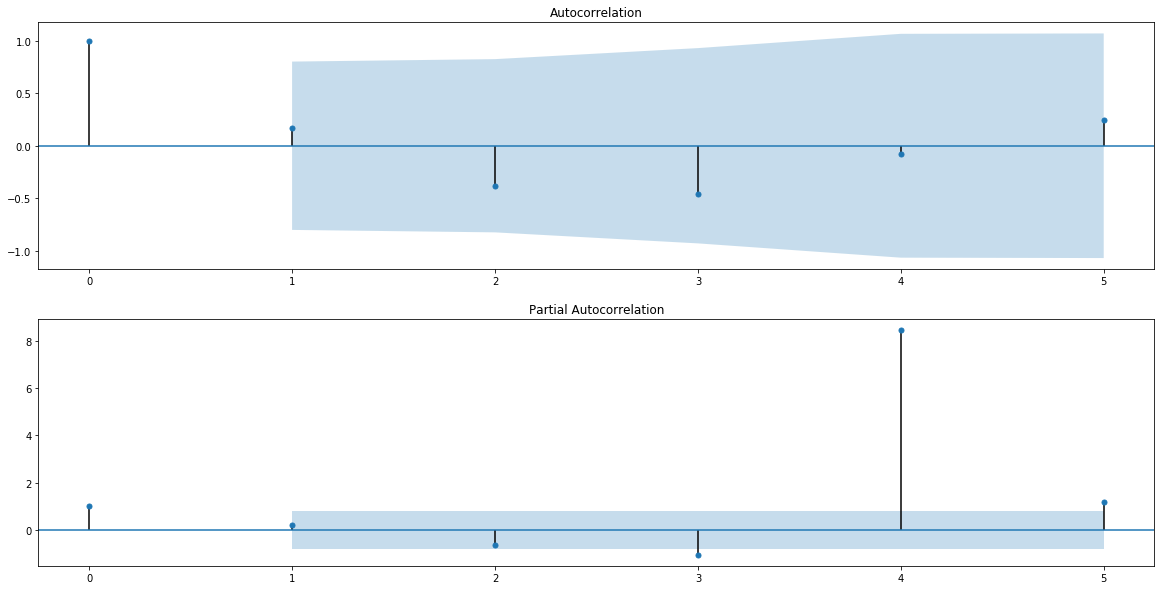

In [8]:
import statsmodels.api as sm

df = csv_array[people][seed][csv][area].copy()
ts = df['y']
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
fig = sm.graphics.tsa.plot_acf(ts, ax=ax1)
fig = sm.graphics.tsa.plot_pacf(ts, ax=ax2)

In [9]:
# df = csv_array[people][seed][csv][area].copy()
# ts = df['y']
# plt.plot(ts)

In [10]:
# diff = ts - ts.shift()
# diff = diff.dropna()
# resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')
# resDiff

In [11]:
# import warnings
# warnings.filterwarnings('ignore')
# from statsmodels.tsa.arima_model import ARIMA

# success_array = []
# failed_array = []
# for _area in loc_list:
#     try:
#         df = csv_array[people][seed][csv][_area].copy()
#         ts = df['y']
#         diff = ts - ts.shift()
#         diff = diff.dropna()
# #         plt.plot(ts)

#         resDiff = sm.tsa.arma_order_select_ic(ts, ic='aic', trend='nc')
#         p = resDiff['aic_min_order'][0]
#         q = resDiff['aic_min_order'][1]
# #         print(resDiff['aic_min_order'])


#         arima = ARIMA(ts, order=(p, 0, q-1)).fit(dist=False)
# #         print(arima.summary())
# #         print(arima.params)

# #         plt.clf()
# #         plt.plot(ts)
# #         plt.plot(arima.predict(start=0,end=7))
# #         plt.legend(['data','predicted'])
#         success_array.append(_area)
#     except:
#         failed_array.append(_area)
        

# print('成功')
# for i in success_array:
#     print(i)
# print('\n失敗')
# for i in failed_array:
#     print(i)

In [12]:
# area = '28'
# df = csv_array[people][seed][csv][area].copy()
# # ts = np.asanyarray(df['y'])
# # ts = np.cumsum(ts)
# ts = df['y']
# diff = ts - ts.shift()
# diff = diff.dropna()
# # plt.plot(ts)

# resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')
# p = resDiff['aic_min_order'][0]
# q = resDiff['aic_min_order'][1]
# print(resDiff['aic_min_order'])


# arima = ARIMA(ts, order=(p, 0, q)).fit(dist=False)
# print(arima.summary())
# print(arima.params)

# plt.clf()
# plt.plot(ts)
# plt.plot(arima.predict(start=0,end=7))
# plt.legend(['data','predicted'])

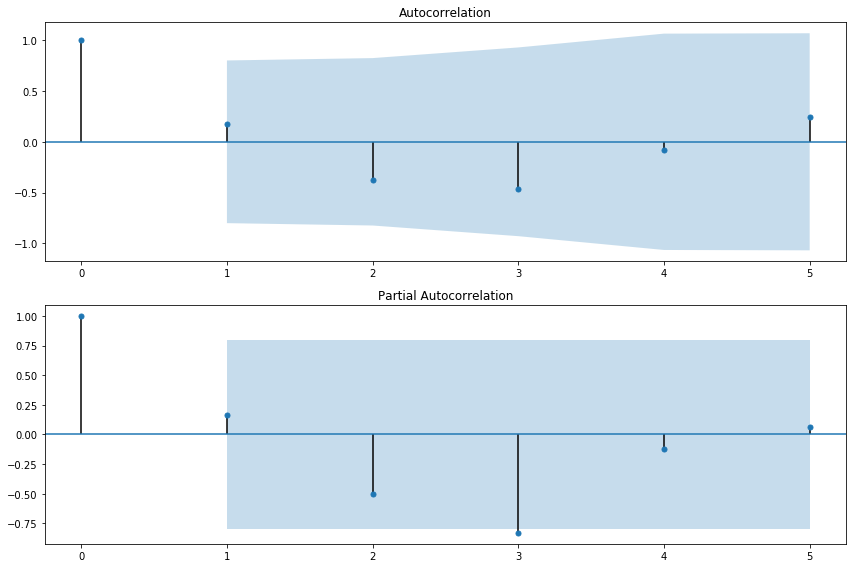

In [13]:
import statsmodels.api as sm

df = csv_array[people][seed][csv][area].copy()
ts = df['y']
diff = ts - ts.shift()
diff = diff.dropna()

# 差分系列
fig = plt.figure(figsize=(12, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ts, lags=5, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(ts, lags=5, method='ols', ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

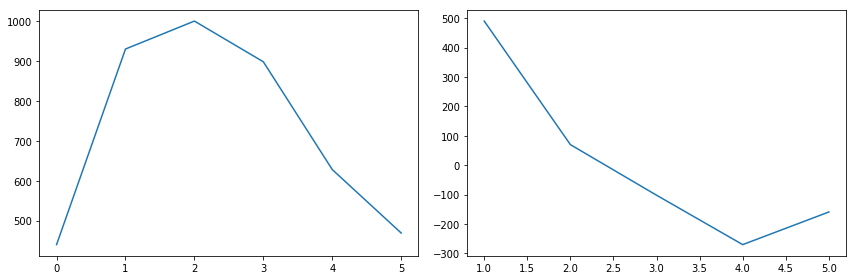

In [14]:
fig = plt.figure(figsize=(12, 4))

# 元のデータ
ax1 = fig.add_subplot(121)
plt.plot(ts)

# 階差のデータ
ax2 = fig.add_subplot(122)
plt.plot(diff)

plt.tight_layout() # グラフ間スキマ調整

/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/kessapassa/anaconda3/lib/python3.6/site-packa

(0, 1)


/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/kessapassa/anaconda3/lib/python3.6/site-packa

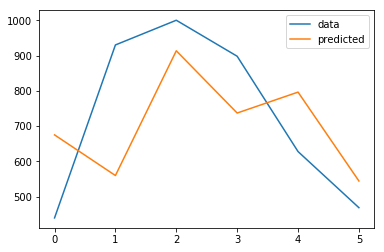

In [15]:
resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')
p = resDiff['aic_min_order'][0]
q = resDiff['aic_min_order'][1]
print(resDiff['aic_min_order'])
model = sm.tsa.ARIMA(ts,order=(p,0,q))
result = model.fit(dist=False)

fig = plt.figure()
plt.clf()
plt.plot(ts)
plt.plot(result.predict(start=0,end=5))
plt.legend(['data','predicted'])
plt.show()

# show_evaluation(ts, result.predict(start=0, end=7))

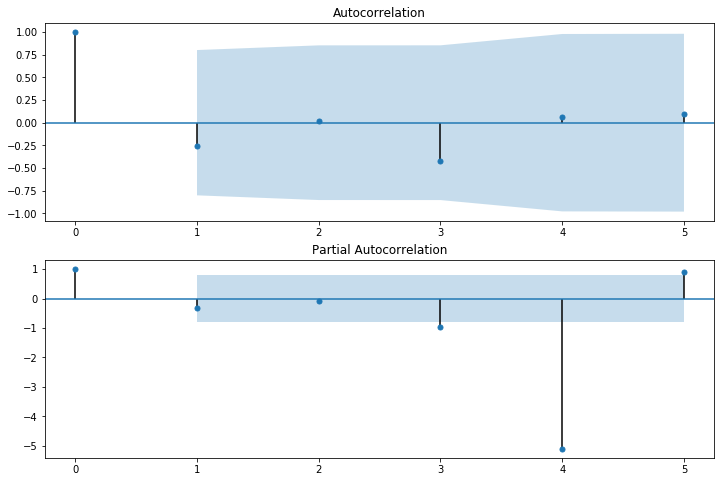

In [16]:
resid = result.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.squeeze(), lags=5, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=5, ax=ax2)

In [17]:
data=np.random.randn(200,1)
data = np.cumsum(data)

In [18]:
resDiff = sm.tsa.arma_order_select_ic(data, ic='aic', trend='nc')
p = resDiff['aic_min_order'][0]
q = resDiff['aic_min_order'][1]
print(resDiff['aic_min_order'])

results=ARIMA(data[:190],order = [p, 0, q]).fit(dist=False)
print(results.params)
print(results.summary())

plt.clf()
plt.plot(data)
plt.plot(results.predict(start=0,end=200))
plt.legend(['data','predicted'])

(1, 0)


NameError: name 'ARIMA' is not defined

# https://logics-of-blue.com/python-time-series-analysis/

In [ ]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats

# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# 統計モデル
import statsmodels.api as sm

In [ ]:
data = pd.read_csv('AirPassengers.csv', 
                   index_col='Month', 
                   parse_dates=True, 
                   dtype='float')
data.head()

In [ ]:
# 日付形式にする
ts = data['#Passengers'] 
ts.head()

In [ ]:
ts.diff().head()

In [ ]:
plt.plot(ts)

In [ ]:
diff = ts - ts.shift()
diff = diff.dropna()
diff.head()

In [ ]:
plt.plot(diff)

In [ ]:
# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')
resDiff

In [ ]:
# P-3, q=2 が最善となったので、それをモデル化
from statsmodels.tsa.arima_model import ARIMA
ARIMA_3_1_2 = ARIMA(ts, order=(3, 0, 2)).fit(dist=False)
ARIMA_3_1_2.params

In [ ]:
# 残差のチェック
# SARIMAじゃないので、周期性が残ってしまっている。。。
resid = ARIMA_3_1_2.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [ ]:
pred = ARIMA_3_1_2.predict('1960-01-01', '1961-12-01')
# 実データと予測結果の図示
plt.plot(ts)
plt.plot(pred, "r")